# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Read CSV

In [3]:
df = pd.read_csv('wewo.csv')
df = df[df["year"] > 1]
df['playoff'] = df['playoff'].map({'N':0,'Y':1})

team_df = pd.read_csv('../data/teams.csv')

# Analysis

### Distribution of playoffs

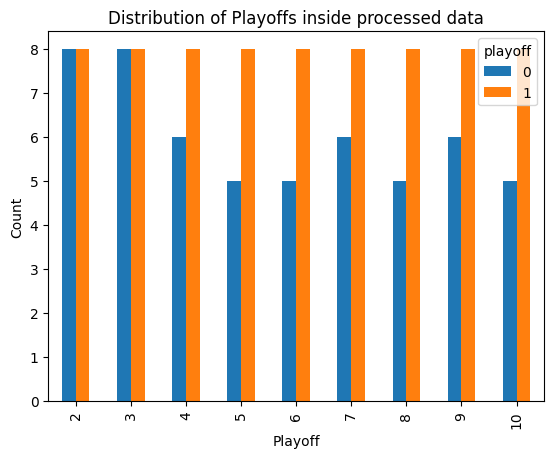

In [4]:
label_distribution = df.groupby(['year', 'playoff']).size().unstack()

label_distribution.plot(kind='bar')
plt.title('Distribution of Playoffs inside processed data')
plt.xlabel('Playoff')
plt.ylabel('Count')

plt.show()


### Correlation Matrix

In [5]:
tempdf = df.drop(columns='tmID', axis=1)
print(list(tempdf.columns))

['year', 'playoff', 'o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'wr', 'GP', 'GS', 'minutes', 'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF', 'dq', 'Award Count', 'PostGP', 'PostGS', 'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds', 'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks', 'PostTurnovers', 'PostPF', 'PostDQ', 'PostthreeRatio', 'PostfgRatio', 'PostftRatio', 'ThreeRatio', 'fgRatio', 'ftRatio', 'coach_wr', 'coach_pwr']


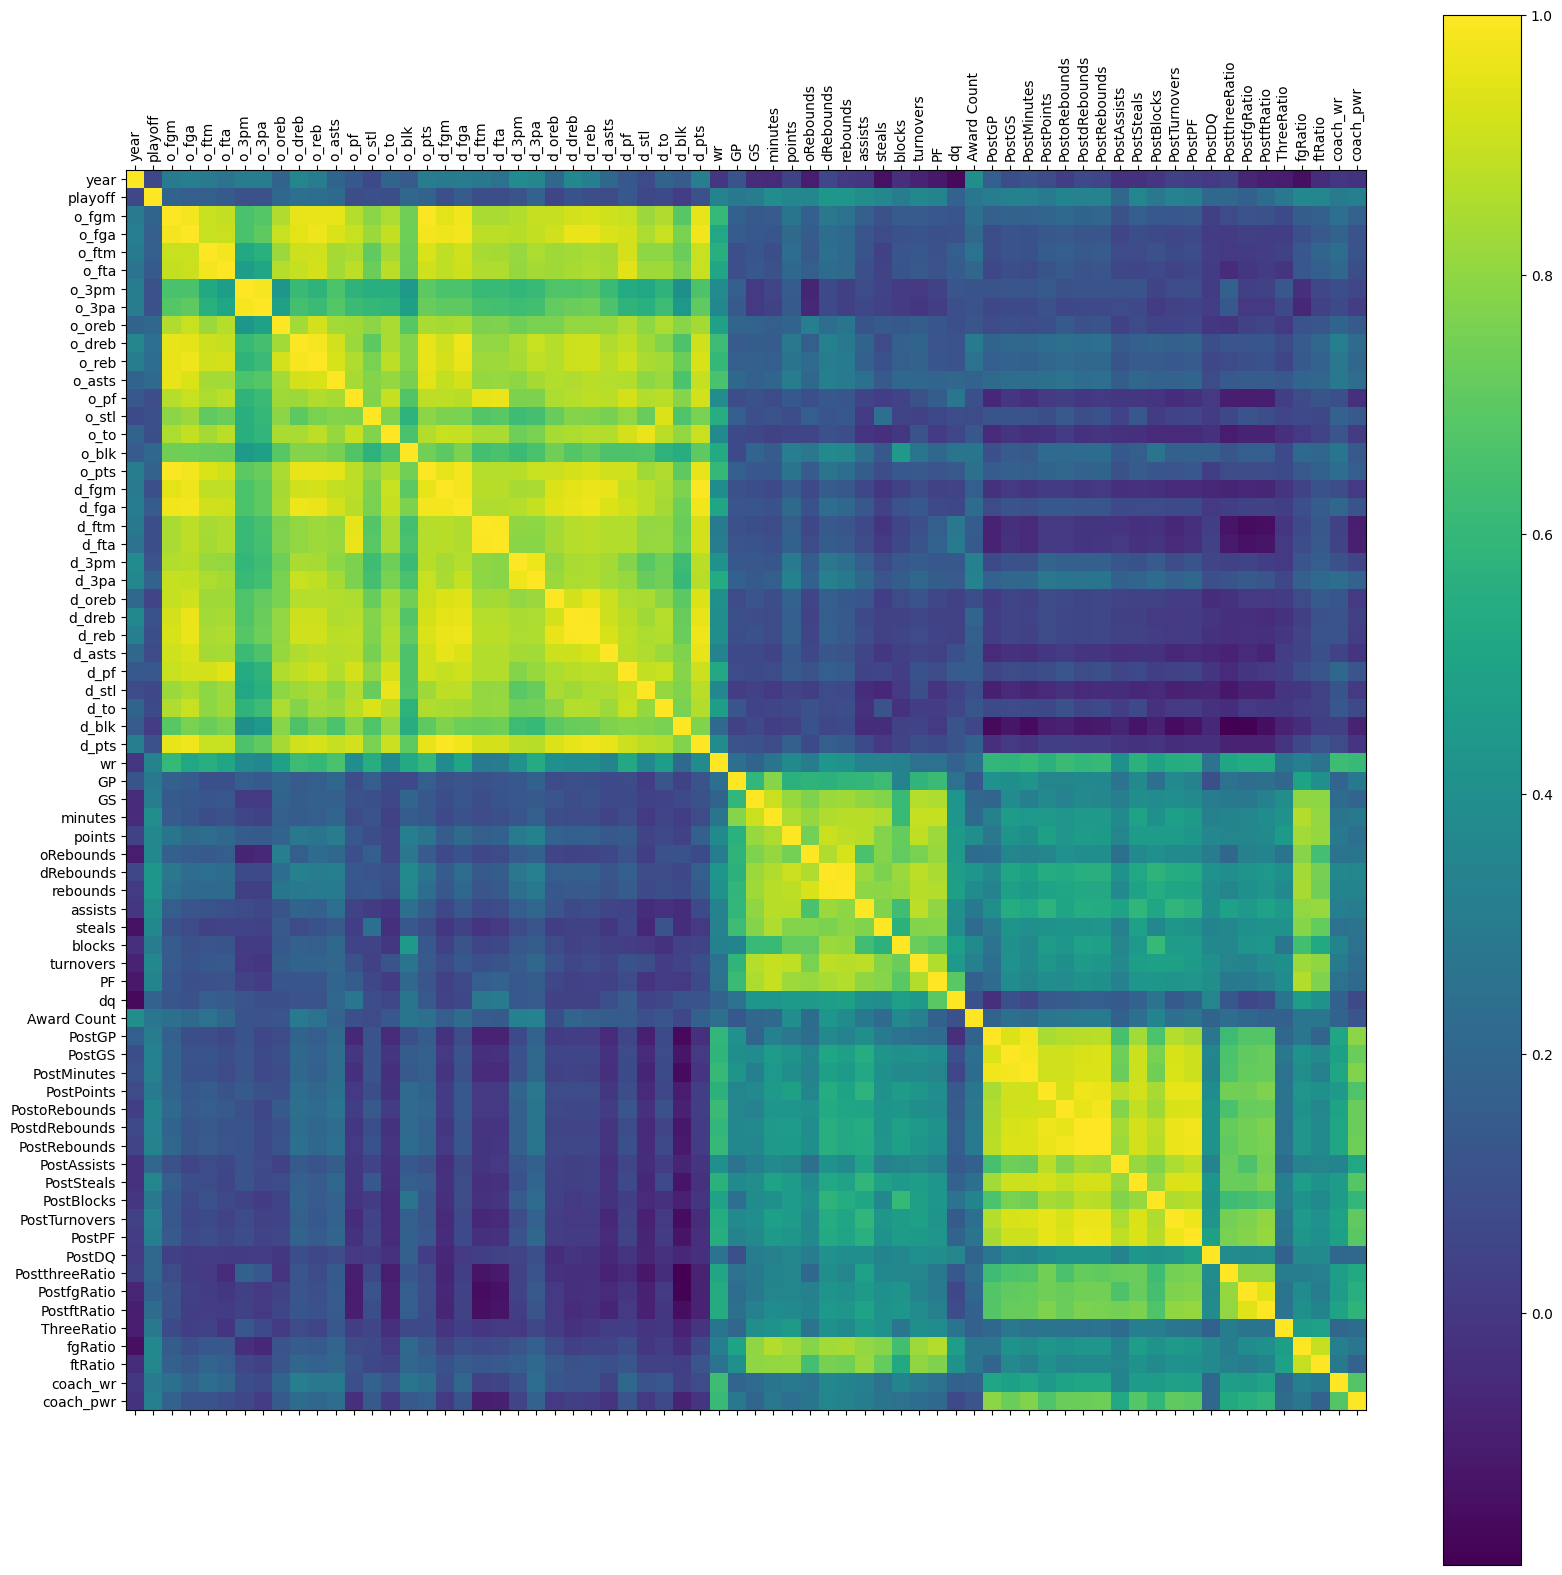

In [6]:
correlation = tempdf.corr()
plt.figure(figsize=(20, 20))
plt.matshow(correlation, fignum=1)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar()

plt.show()

### Pairplot

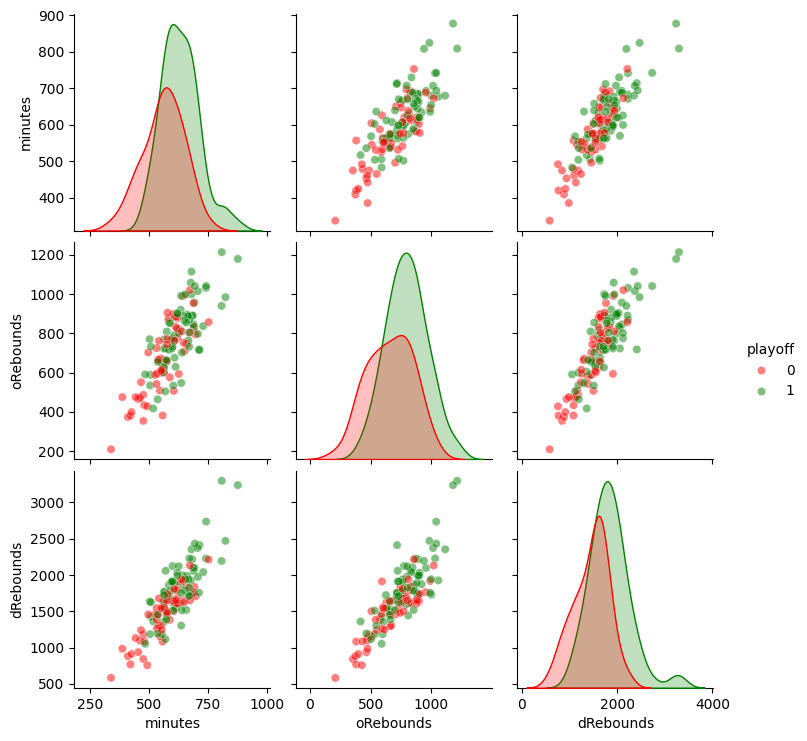

In [7]:
sample_size = df.__len__()

attributes = ["playoff", "minutes", "oRebounds", "dRebounds"]

sample = df.sample(sample_size)[attributes]

palette = {0: 'red', 1: 'green'}
sb.pairplot(sample, hue='playoff', palette=palette, plot_kws={'alpha': 0.5})

### Points / Playoff

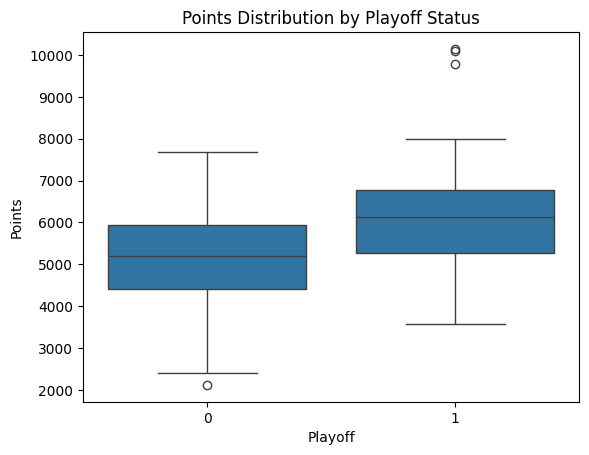

In [8]:
sb.boxplot(x='playoff', y='points', data=df)
plt.title('Points Distribution by Playoff Status')
plt.xlabel('Playoff')
plt.ylabel('Points')
plt.show()

In [ ]:
playoff_teams = df[df['playoff'] == 1]
non_playoff_teams = df[df['playoff'] == 0]
print(non_playoff_teams.__len__(), playoff_teams.__len__())

# how many teams didn't make it to the playoffs with > 6000 points
hp = df[(df['points'] > 6000) & (df['playoff'] == 0)]
print(hp[['year', 'tmID', 'points']])

# how many teams made it to the playoffs with < 5000 points
lp = df[(df['points'] < 5000) & (df['playoff'] == 1)]
print(lp[['year', 'tmID', 'points']])

54 72
     year tmID       points
21     10  CON  6433.011254
22      2  DET  6569.736735
59      2  MIN  6553.300765
65      8  MIN  6442.673463
67     10  MIN  7033.156560
70      4  NYL  7682.648990
77      2  ORL  6334.074567
83      6  PHO  6047.095482
86      9  PHO  7659.621770
88      2  POR  6106.463251
99      4  SAS  6980.792161
117     2  WAS  7630.188303
     year tmID       points
3       3  CHA  4569.733729
12      2  CLE  3821.461397
14      4  CLE  4655.664482
31      2  HOU  4491.567318
40      3  IND  4368.467581
57      2  MIA  4826.131793
72      6  NYL  4622.254395
74      8  NYL  3582.056680
75      9  NYL  4735.585512
96      8  SAC  4189.669522
97      9  SAC  4657.649293
107     3  SEA  3719.730531
112     8  SEA  4975.651883
118     3  WAS  4029.842687


In [21]:
import numpy as np
from scipy import stats

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
df_zscores = df[numeric_cols].apply(stats.zscore)

# Identify outliers where Z-score > 3 or Z-score < -3 in any column
outliers = df[(np.abs(df_zscores) > 3).any(axis=1)]

# Display outliers
print(outliers)

     year tmID  playoff       o_fgm        o_fga       o_ftm       o_fta  \
0       9  ATL        0    0.000000     0.000000    0.000000    0.000000   
8       7  CHI        0    0.000000     0.000000    0.000000    0.000000   
15      4  CON        1    0.000000     0.000000    0.000000    0.000000   
31      2  HOU        1  891.000000  1894.000000  521.000000  634.000000   
33      4  HOU        1  765.560000  1815.740000  451.140000  579.750000   
48      2  LAS        1  861.000000  1956.000000  545.000000  693.000000   
49      3  LAS        1  899.500000  2008.500000  477.800000  623.700000   
50      4  LAS        1  893.550000  2003.950000  476.540000  638.610000   
51      5  LAS        1  893.865000  2099.185000  518.862000  666.183000   
56     10  LAS        1  949.603472  2251.361050  527.734335  696.927565   
68      2  NYL        1  792.000000  1815.000000  429.000000  567.000000   
70      4  NYL        0  786.610000  1765.230000  389.170000  552.930000   
73      7  N

In [23]:
from sklearn.ensemble import IsolationForest

# Prepare data (drop non-numeric columns if necessary)
X = df[numeric_cols]

# Fit the model
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_forest.fit(X)

# Add the scores and predictions to the DataFrame
df['anomaly_score'] = iso_forest.decision_function(X)
df['outlier'] = iso_forest.predict(X)

# Outliers are labeled as -1
outliers = df[df['outlier'] == -1]

# Display outliers
print(outliers)

     year tmID  playoff        o_fgm        o_fga       o_ftm       o_fta  \
0       9  ATL        0     0.000000     0.000000    0.000000    0.000000   
8       7  CHI        0     0.000000     0.000000    0.000000    0.000000   
15      4  CON        1     0.000000     0.000000    0.000000    0.000000   
33      4  HOU        1   765.560000  1815.740000  451.140000  579.750000   
51      5  LAS        1   893.865000  2099.185000  518.862000  666.183000   
56     10  LAS        1   949.603472  2251.361050  527.734335  696.927565   
68      2  NYL        1   792.000000  1815.000000  429.000000  567.000000   
70      4  NYL        0   786.610000  1765.230000  389.170000  552.930000   
86      9  PHO        0  1044.796979  2382.839807  589.210347  730.912965   
87     10  PHO        1  1061.739094  2454.351942  626.163104  760.373889   
99      4  SAS        0     0.000000     0.000000    0.000000    0.000000   
115     2  UTA        1   858.000000  1896.000000  609.000000  790.000000   

In [24]:
from sklearn.neighbors import LocalOutlierFactor

# Fit the model
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Predict anomalies (-1 for outliers)
df['outlier'] = lof.fit_predict(X)

# Extract scores (negative scores are outliers)
df['anomaly_score'] = lof.negative_outlier_factor_

# Identify outliers
outliers = df[df['outlier'] == -1]

# Display outliers
print(outliers)

     year tmID  playoff        o_fgm        o_fga       o_ftm       o_fta  \
0       9  ATL        0     0.000000     0.000000    0.000000    0.000000   
8       7  CHI        0     0.000000     0.000000    0.000000    0.000000   
15      4  CON        1     0.000000     0.000000    0.000000    0.000000   
33      4  HOU        1   765.560000  1815.740000  451.140000  579.750000   
51      5  LAS        1   893.865000  2099.185000  518.862000  666.183000   
56     10  LAS        1   949.603472  2251.361050  527.734335  696.927565   
73      7  NYL        0   824.803470  1876.530210  436.443590  546.670110   
81      4  PHO        0   788.440000  1882.040000  419.760000  559.360000   
86      9  PHO        0  1044.796979  2382.839807  589.210347  730.912965   
87     10  PHO        1  1061.739094  2454.351942  626.163104  760.373889   
89      3  POR        0   741.400000  1872.100000  461.400000  637.500000   
99      4  SAS        0     0.000000     0.000000    0.000000    0.000000   